In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
import tensorflow as tf


In [6]:


training_data=[]
training_labels=[]

testing_data=[]
testing_labels=[]

DATADIR = "C:/Users/NINANMM.000/OneDrive - University of Cincinnati/Desktop/next_test"

CATEGORIES = ["subject01", "subject02","subject03", "subject04", "subject05","subject06","subject07"]
CATEGORIES_TRAIN=["subject08","subject09", "subject10","subject11","subject12", "subject13", "subject14"]

IMG_SIZEX=280
IMG_SIZEY=280


for category in CATEGORIES:
    
    path = os.path.join(DATADIR,category)  
    class_num= CATEGORIES.index(category)
    j=0
    for img in os.listdir(path): 
        
        img_array = mpimg.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        new_array=cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))

        training_data.append(new_array)
        training_labels.append(j)
        j+=1
        
        
training_data=np.array(training_data)
training_labels=np.array(training_labels)




for category in CATEGORIES_TRAIN:
    
    path = os.path.join(DATADIR,category)  
    class_num= CATEGORIES_TRAIN.index(category)
    j=0
    for img in os.listdir(path): 
        
        img_array = mpimg.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        new_array=cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))

        testing_data.append(new_array)
        testing_labels.append(j)
        j+=1
        
        
testing_data=np.array(testing_data)
testing_labels=np.array(testing_labels)

In [7]:
print(len(training_labels))
print(training_data.shape)
print(testing_data.shape)

84
(84, 280, 280)
(84, 280, 280)


1
[[130 130 130 ... 255 255 255]
 [230 230 230 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 254 255 255]
 [218 218 218 ... 218 218 218]
 [ 68  68  68 ...  68  68  68]]


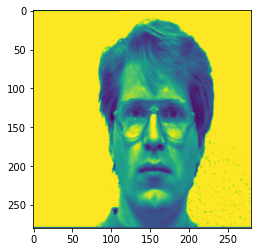

In [8]:
plt.imshow(training_data[1])
print(training_labels[1])
print(training_data[1])

In [9]:
training_data = training_data / 255.0
testing_data=testing_data/255.0

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(35,(5,5), activation=tf.nn.relu,input_shape=(280,280,1)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(120,(5,5), activation=tf.nn.relu), 
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [11]:
type(training_data)
training_data = training_data.reshape(-1, 280, 280, 1)
testing_data = testing_data.reshape(-1, 280, 280, 1)

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit(training_data, training_labels, epochs=100,validation_data=(testing_data,testing_labels))

Epoch 1/100
3/3 [==============================] - 7s 709ms/step - loss: 4.1738 - accuracy: 0.0833 - val_loss: 2.9586 - val_accuracy: 0.0714
Epoch 2/100
3/3 [==============================] - 0s 107ms/step - loss: 2.6771 - accuracy: 0.1071 - val_loss: 2.4846 - val_accuracy: 0.1071
Epoch 3/100
3/3 [==============================] - 0s 107ms/step - loss: 2.4825 - accuracy: 0.1310 - val_loss: 2.4836 - val_accuracy: 0.0833
Epoch 4/100
3/3 [==============================] - 0s 108ms/step - loss: 2.4678 - accuracy: 0.1667 - val_loss: 2.4879 - val_accuracy: 0.1071
Epoch 5/100
3/3 [==============================] - 0s 106ms/step - loss: 2.4455 - accuracy: 0.1310 - val_loss: 2.4701 - val_accuracy: 0.1310
Epoch 6/100
3/3 [==============================] - 0s 107ms/step - loss: 2.3300 - accuracy: 0.2976 - val_loss: 2.4648 - val_accuracy: 0.1310
Epoch 7/100
3/3 [==============================] - 0s 107ms/step - loss: 2.1966 - accuracy: 0.3690 - val_loss: 2.4726 - val_accuracy: 0.1905
Epoch 8/100
3

Epoch 59/100
3/3 [==============================] - 0s 109ms/step - loss: 0.2300 - accuracy: 0.8095 - val_loss: 6.1680 - val_accuracy: 0.2024
Epoch 60/100
3/3 [==============================] - 0s 112ms/step - loss: 0.2522 - accuracy: 0.7976 - val_loss: 6.1396 - val_accuracy: 0.1905
Epoch 61/100
3/3 [==============================] - 0s 107ms/step - loss: 0.2437 - accuracy: 0.8452 - val_loss: 5.8603 - val_accuracy: 0.2143
Epoch 62/100
3/3 [==============================] - 0s 109ms/step - loss: 0.2542 - accuracy: 0.8214 - val_loss: 5.6180 - val_accuracy: 0.2024
Epoch 63/100
3/3 [==============================] - 0s 112ms/step - loss: 0.2542 - accuracy: 0.8571 - val_loss: 5.5449 - val_accuracy: 0.2024
Epoch 64/100
3/3 [==============================] - 0s 109ms/step - loss: 0.2538 - accuracy: 0.8452 - val_loss: 5.4397 - val_accuracy: 0.2024
Epoch 65/100
3/3 [==============================] - 0s 109ms/step - loss: 0.2467 - accuracy: 0.8571 - val_loss: 5.3835 - val_accuracy: 0.1905
Epoch 

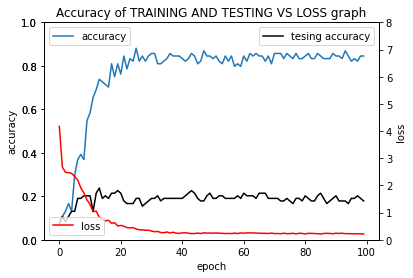

In [14]:
plt.title("Accuracy of TRAINING AND TESTING VS LOSS graph")


plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.plot(history.history['accuracy'])
plt.ylim([0,1])
plt.legend(['accuracy'],loc=2)

plt.twinx()
plt.plot(history.history['val_accuracy'],color='black')
plt.ylim([0,1])

plt.legend(['tesing accuracy'],loc=1)

plt.twinx()




plt.plot(history.history['loss'],color='red')
plt.ylabel('loss')
plt.ylim([0,8])
plt.legend(['loss'],loc=3)




plt.show()

In [ ]:

model.evaluate(testing_data, testing_labels)

In [15]:
training_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:

so from this we can hypotyhioseis the followeing that any change to the cross entropy ca
cnan  effect the minor axis of siad model. by back propegratioon
